In [8]:
import numpy as np
from importlib import reload
import time
import nnmath
import ann
import cnn

In [9]:
training_input = np.load('training_input.npy')
training_output = np.load('training_output.npy')
test_input = np.load('test_input.npy')
test_output = np.load('test_output.npy')
validation_input = np.load('validation_input.npy')
validation_output = np.load('validation_output.npy')
weights0 = np.load('weights0.npy')
weights1 = np.load('weights1.npy')
biases0 = np.load('biases0.npy')
biases1 = np.load('biases1.npy')

In [20]:
ndim_input = 784
image_shape = (1, 28, 28)
ndim_output = 10
n_training = training_input.shape[0]
n_test = test_input.shape[0]
n_validation = validation_input.shape[0]
training_data = (training_input.reshape(np.r_[n_training, np.asarray(image_shape)]), training_output)
test_data = (test_input.reshape(np.r_[n_test, np.asarray(image_shape)]), test_output)
validation_data = (validation_input.reshape(np.r_[n_validation, np.asarray(image_shape)]), validation_output)

In [1057]:
n = 5000
small_training = (training_input[0:n].reshape(np.r_[n, np.asarray(image_shape)]), training_output[0:n])
n = 1000
small_test = (test_input[0:n].reshape(np.r_[n, np.asarray(image_shape)]), test_output[0:n])

In [962]:
reload(nnmath)
reload(nnmath)
reload(cnn)
reload(cnn)

<module 'cnn' from '/Users/Benjamin/Code/BGT-Cosmology/DeepLearning/cnn.py'>

In [1050]:
feature_shape = (6, 5, 5)
cplayer = cnn.ConvPoolLayer(image_shape, feature_shape)
cplayer.set_mini_batch_size(10)
#feature_shape2 = (12, 5, 5)
#cplayer2 = cnn.ConvPoolLayer((4,12,12), feature_shape2)
fcplayer = cnn.FullyConnectedLayer(6*12*12, 10)
net = cnn.Network((cplayer, fcplayer), cfunc='crossentropy')
#net = cnn.Network((cplayer, cplayer2, fcplayer), cfunc='crossentropy')
#outlayer = cnn.FullyConnectedLayer(20, 10)
#net = cnn.Network((cplayer, fcplayer, outlayer), cfunc='crossentropy')

In [1059]:
net.set_parameters(stepsize=0.5, overfit_lambda=0E-0/50000.)
net.set_mini_batch_size(13)
net.max_epochs = 10
t0 = time.time()
net.SGD(small_training, test_data=small_test)
#net.SGD(training_data, test_data=test_data)
t1 = time.time()
print("Time lapsed {0:6.3f} secs".format(t1-t0))

Cost =  7.00771251087
Epoch 0: 880 / 1000 = 88.000%
Cost =  3.4291921649
Epoch 1: 886 / 1000 = 88.600%
Cost =  5.45714805138
Epoch 2: 880 / 1000 = 88.000%
Cost =  6.996634504
Epoch 3: 883 / 1000 = 88.300%
Cost =  3.18087157591
Epoch 4: 889 / 1000 = 88.900%
Cost =  1.88736759171
Epoch 5: 893 / 1000 = 89.300%
Cost =  6.54139933045
Epoch 6: 890 / 1000 = 89.000%
Cost =  5.21468544537
Epoch 7: 878 / 1000 = 87.800%
Cost =  7.56773420361
Epoch 8: 884 / 1000 = 88.400%
Cost =  3.3610071809
Epoch 9: 879 / 1000 = 87.900%
Time lapsed 66.686 secs


In [1026]:
f_fcplayer = cnn.FullyConnectedLayer(1*28*28, 100)
f_outlayer = cnn.FullyConnectedLayer(100, 10)
fnet = cnn.Network((f_fcplayer, f_outlayer), cfunc='crossentropy')

In [1031]:
fnet.set_parameters(stepsize=0.125, overfit_lambda=2E-2/50000.)
fnet.set_mini_batch_size(12)
fnet.max_epochs = 10
t0 = time.time()
#fnet.SGD(small_training, test_data=small_test)
fnet.SGD(training_data, test_data=test_data)
t1 = time.time()
print("Time lapsed {0:6.3f} secs".format(t1-t0))

Cost =  0.671788520065
Epoch 0: 9776 / 10000 = 97.760%
Cost =  0.441627207711
Epoch 1: 9770 / 10000 = 97.700%
Cost =  0.106435465662
Epoch 2: 9773 / 10000 = 97.730%
Cost =  1.51354143279
Epoch 3: 9773 / 10000 = 97.730%
Cost =  0.4030617056
Epoch 4: 9771 / 10000 = 97.710%
Cost =  0.616926235069
Epoch 5: 9771 / 10000 = 97.710%
Cost =  0.550377341938
Epoch 6: 9773 / 10000 = 97.730%
Cost =  0.313737327815
Epoch 7: 9765 / 10000 = 97.650%
Cost =  1.12174570468
Epoch 8: 9773 / 10000 = 97.730%
Cost =  0.0672724509103
Epoch 9: 9774 / 10000 = 97.740%
Time lapsed 89.425 secs


In [1032]:
test_results = np.argmax(fnet.feedforward(validation_data[0]), axis=1)
#tmp_test_data = np.argmax(test_data[1], axis=1)
test_results_random = np.random.choice(np.arange(10), size=(test_results.shape))

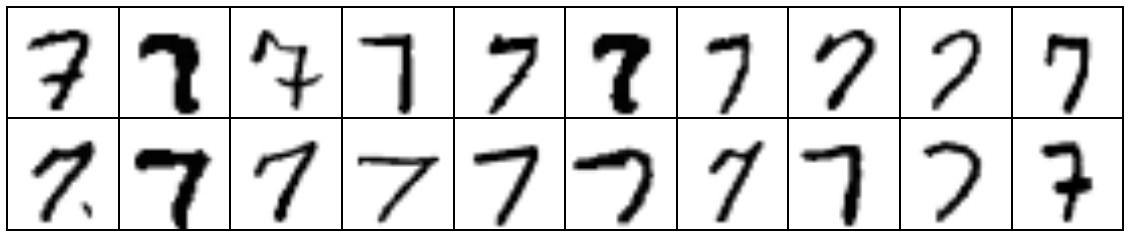

In [1046]:
fig = plt.figure(figsize=(20,4))
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1,
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0)
axnum = 0
#plt.subplots(figsize=(20, 4))

select_number = 7
index = np.where(test_results==select_number)[0]
tmp_image = validation_data[0][index][np.random.choice(np.arange(index.size), size=(20))].reshape(20, 28, 28)
output = np.zeros((28*2, 28*10))
for i in np.arange(2):
    for j in np.arange(10):
        axnum += 1
        ax = fig.add_subplot(2, 10, axnum)
        ax.imshow(tmp_image[i*10+j, ...], cmap=plt.cm.Greys)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # output[i*28:(i+1)*28, j*28:(j+1)*28] = tmp_image[i*10+j,:,:]
#ax.imshow(output,cmap = plt.cm.Greys)


#random_images = test_data[0][np.random.randint(0, test_results.size, size=20)].shape

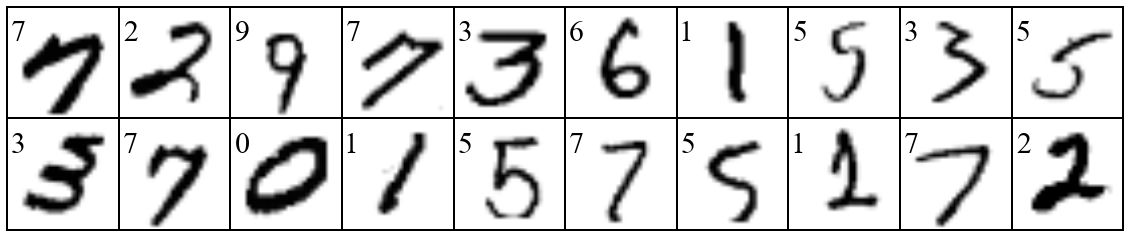

In [1045]:
fig = plt.figure(figsize=(20,4))
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1,
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0)
axnum = 0
#plt.subplots(figsize=(20, 4))

index = np.random.choice(np.arange(test_results.size), size=(20))
tmp_image = validation_data[0][index].reshape(20, 28, 28)
tmp_results = test_results[index]
output = np.zeros((28*2, 28*10))
for i in np.arange(2):
    for j in np.arange(10):
        axnum += 1
        ax = fig.add_subplot(2, 10, axnum)
        ax.imshow(tmp_image[i*10+j, ...], cmap=plt.cm.Greys)
        ax.text(0.8, 8.0,tmp_results[i*10+j],fontsize=30)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [486]:
layer.activation_deriv(layer.z)

array([[  6.29432652e-07,   7.92257596e-08,   1.66652905e-06,
          6.01070380e-12,   3.26821699e-05,   3.12394019e-14,
          5.55871707e-13,   3.16913045e-14,   3.55237593e-05,
          1.85577024e-14],
       [  6.08261002e-07,   9.47438392e-08,   2.06963706e-06,
          7.34990889e-12,   3.37671347e-05,   3.52201172e-14,
          6.33763787e-13,   3.67467436e-14,   3.71333644e-05,
          1.95504547e-14],
       [  7.38022404e-07,   1.34384755e-07,   2.07562461e-06,
          9.74226117e-12,   4.04142686e-05,   5.11087941e-14,
          8.85945391e-13,   4.99618994e-14,   3.86231172e-05,
          2.61273584e-14],
       [  6.33236755e-07,   9.41225255e-08,   1.94939890e-06,
          6.50883147e-12,   3.45824794e-05,   3.79909687e-14,
          6.90311493e-13,   3.63844468e-14,   3.79822152e-05,
          2.15158003e-14],
       [  5.71766096e-07,   9.40379307e-08,   1.83340184e-06,
          6.92411145e-12,   3.26382590e-05,   3.74544082e-14,
          7.19258149e-13

In [172]:
convolved = net.layers[0].feedforward(test_data[0])
fullyconnected = net.layers[1].feedforward(convolved)
allout = net.layers[2].feedforward(fullyconnected)

In [173]:
test_results = np.argmax(allout, axis=1)
tmp_test_data = np.argmax(test_data[1], axis=1)
print(np.count_nonzero(np.equal(test_results, tmp_test_data)))

915


In [183]:
tmprandom = np.random.choice(np.arange(10), size=10000)
print(np.count_nonzero(np.equal(tmprandom, tmp_test_data)))

1035


In [522]:
864/12/12

6.0

In [203]:
training_data[0].shape

(50000, 1, 28, 28)

In [215]:
tt = np.zeros((10,1,28,28))

In [348]:
np.arange(2,3)

array([2])

In [445]:
3*12*12

432

In [566]:
x = np.random.random((1000, 4))

In [568]:
xx = np.amax(x, axis=1)

In [569]:
xx.mean()

0.79790526112478199

In [623]:
#atmp = np.arange(100).reshape(10,10)
atmp = np.random.random(8*8).reshape(8,8)

In [624]:
atmp

array([[ 0.39852041,  0.03170197,  0.56369489,  0.89461797,  0.39092604,
         0.53986279,  0.86549128,  0.83207734],
       [ 0.07450954,  0.83592868,  0.76266365,  0.51327069,  0.88694714,
         0.22959888,  0.3806292 ,  0.60999931],
       [ 0.84795426,  0.86260655,  0.12545764,  0.61764295,  0.4392077 ,
         0.36925064,  0.98267062,  0.28868807],
       [ 0.59114077,  0.43571234,  0.06763429,  0.98145085,  0.18746829,
         0.94313176,  0.79040441,  0.61865873],
       [ 0.19822483,  0.98176437,  0.96932787,  0.15865422,  0.16582453,
         0.05116514,  0.13688069,  0.95870921],
       [ 0.391712  ,  0.06496844,  0.1231119 ,  0.38912001,  0.28551473,
         0.40647284,  0.34339832,  0.96878603],
       [ 0.39841759,  0.89769987,  0.39817487,  0.52085182,  0.34928197,
         0.02387799,  0.65997819,  0.15125936],
       [ 0.48280446,  0.92270777,  0.14959256,  0.49288366,  0.83282307,
         0.6032285 ,  0.32637258,  0.29735631]])

In [640]:
mask = np.zeros((8,8), dtype=bool)
aa = nnmath.maxpooling22_down(atmp, mask=mask)

In [651]:
reload(nnmath)
reload(nnmath)

<module 'nnmath' from '/Users/Benjamin/Code/BGT-Cosmology/DeepLearning/nnmath.py'>

In [641]:
mask

array([[False, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False,  True, False],
       [False, False, False,  True, False,  True, False, False],
       [False,  True,  True, False, False, False, False, False],
       [False, False, False, False, False,  True, False,  True],
       [False, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False, False]], dtype=bool)

In [642]:
atmp[mask]

array([ 0.89461797,  0.86549128,  0.83592868,  0.88694714,  0.86260655,
        0.98267062,  0.98145085,  0.94313176,  0.98176437,  0.96932787,
        0.40647284,  0.96878603,  0.52085182,  0.65997819,  0.92270777,
        0.83282307])

In [658]:
btmp = np.arange(4*4).reshape(4,4)+10

In [659]:
nnmath.maxpooling22_up(btmp, mask=mask)

(4, 4) [ 8.  8.] (8, 8) (8, 8)


array([[  0.,   0.,   0.,  11.,   0.,   0.,  13.,   0.],
       [  0.,  10.,   0.,   0.,  12.,   0.,   0.,   0.],
       [  0.,  14.,   0.,   0.,   0.,   0.,  17.,   0.],
       [  0.,   0.,   0.,  15.,   0.,  16.,   0.,   0.],
       [  0.,  18.,  19.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  20.,   0.,  21.],
       [  0.,   0.,   0.,  23.,   0.,   0.,  25.,   0.],
       [  0.,  22.,   0.,   0.,  24.,   0.,   0.,   0.]])

In [656]:
mask

array([[False, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False,  True, False],
       [False, False, False,  True, False,  True, False, False],
       [False,  True,  True, False, False, False, False, False],
       [False, False, False, False, False,  True, False,  True],
       [False, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False, False]], dtype=bool)

In [798]:
btmp

array([[10, 11, 12, 13],
       [14, 15, 16, 17],
       [18, 19, 20, 21],
       [22, 23, 24, 25]])

In [799]:
btmp[::-1, ::-1]

array([[25, 24, 23, 22],
       [21, 20, 19, 18],
       [17, 16, 15, 14],
       [13, 12, 11, 10]])

In [986]:
import matplotlib.pyplot as plt
%matplotlib inline